In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the census_income_dataset

census_df = pd.read_csv("census_income_dataset.csv")

array([' <=50K', ' >50K'], dtype=object)

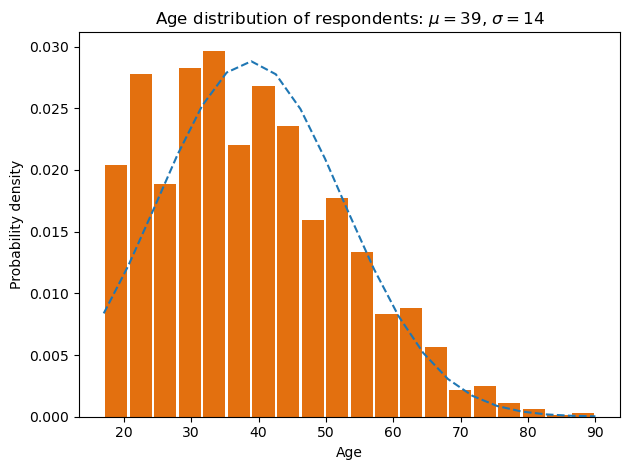

In [163]:
age = census_df.AGE
mu = np.mean(age)   # Mean of the ages
sigma = np.std(age) # Standard deviation of the age distribution

num_bins = 20
bin_width = 0.9
color = "#E3700F"

fig, ax = plt.subplots()

n, bins, patches = ax.hist(age, bins=num_bins, rwidth=bin_width, color=color, density=True)
# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax.plot(bins, y, '--')
ax.set_xlabel('Age')
ax.set_ylabel('Probability density')
ax.set_title('Age distribution of respondents: '
             fr'$\mu={mu:.0f}$, $\sigma={sigma:.0f}$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

# save as svg file
fig.savefig('age_distribution.svg', format='svg', dpi=1200)


[' Husband', ' Not-in-family', ' Own-child', ' Unmarried', ' Wife', ' Other-relative']


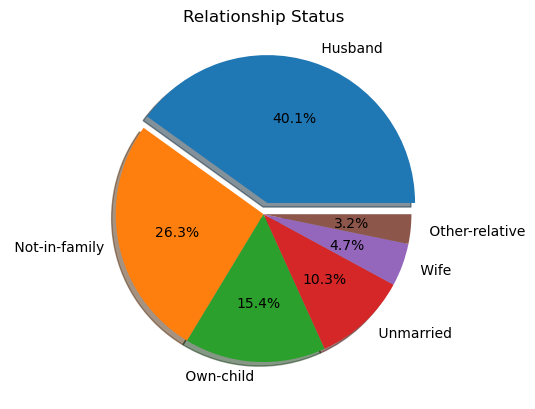

In [164]:
realtionship_status = census_df.RELATIONSHIP

# Calculate how frequent the relationship status is
values = realtionship_status.value_counts()
status = values.index.to_list()

print(status)

explode = (0.08, 0, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'Husband')

fig, ax = plt.subplots()
colors=['olivedrab', 'rosybrown', 'gray', 'saddlebrown']

ax.pie(values.values, labels=status, autopct='%1.1f%%', explode=explode, shadow=True)
ax.set_title("Relationship Status")

# save as svg file
fig.savefig('relationship_status.svg', format='svg', dpi=1200)


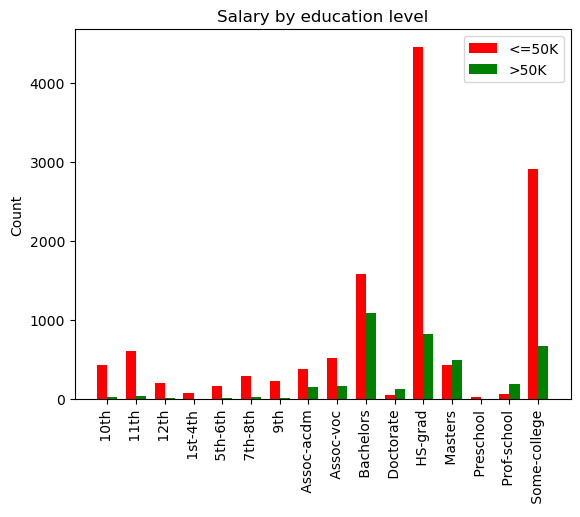

In [165]:
# Investigate and visualize how many respondents have a salary of <=50k or >50k within each
# educational level. (Hint: You can group the values, i.e. you can count “<=50k” as value 0,
# “>50k” as value 1)

# Create a new column with the values 0 and 1
census_df["SALARY"] = census_df["SALARY"].replace("<=50K", 0)
census_df["SALARY"] = census_df["SALARY"].replace(">50K", 1)

# Group the values by education level and salary
values = census_df.groupby(["EDUCATION", "SALARY"]).size()

# Create a new dataframe with the values
df = pd.DataFrame(values)
df = df.reset_index()

# change the column name 0 to COUNT
df = df.rename(columns={0: "COUNT"})

# Create a bar blot with two bars for each salary level
fig, ax = plt.subplots()
width = 0.35
ind = np.arange(len(df.EDUCATION.unique()))
ax.bar(ind, df[df["SALARY"] == " <=50K"].COUNT, width, color='r', label='<=50K')
ax.bar(ind + width, df[df["SALARY"] == " >50K"].COUNT, width, color='g', label='>50K')

ax.set_ylabel('Count')
ax.set_title('Salary by education level')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(df.EDUCATION.unique(), rotation=90)
ax.legend()

plt.show()

# save as svg file
fig.savefig('salary_by_education_level.svg', format='svg', dpi=1200)

4455